Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.


-  Boosting

- Boosting trains models sequentially.

- Each new model focuses on the errors (misclassified data points) made by the previous models.

- By giving more weight to difficult cases, boosting reduces bias and variance.

- Weak Learner

- A weak learner is a model that performs just slightly better than random guessing.
Example: A decision stump (a decision tree with only 1 split).

-  How Boosting Works (Step-by-Step):

- Initialize: Train a weak learner (e.g., a small decision tree) on the dataset.

- Evaluate errors: Find where the model predicted incorrectly.

- Re-weight samples: Give higher weight to the misclassified samples.

- Train new learner: The next weak learner focuses more on the difficult points.

- Combine learners: Final prediction is a weighted majority vote (classification) or weighted average (regression) of all learners.

-  How it Improves Weak Learners:

- Individually, weak learners are not very accurate.

- By training multiple weak learners on different "views" of the data (with weights adjusted), boosting reduces bias and turns weak learners into a strong predictor.

- The final model is much more powerful than a single weak learner.

-  Popular Boosting Algorithms:

- AdaBoost (Adaptive Boosting) – Adjusts weights of misclassified samples.

- Gradient Boosting – Optimizes errors by using gradient descent.

- XGBoost, LightGBM, CatBoost – Advanced, faster, and more accurate versions.


Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

1. AdaBoost (Adaptive Boosting):

- AdaBoost works by assigning weights to training samples.

- After each round, misclassified samples get higher weights so that the next weak learner focuses more on those difficult cases.

- The final model combines weak learners using a weighted majority vote (for classification) or weighted sum (for regression).

- Key Point: AdaBoost adjusts data weights.

2. Gradient Boosting:

- Gradient Boosting builds models sequentially by fitting each new learner on the residual errors (difference between actual and predicted values) of the previous model.

- It uses gradient descent optimization to minimize the loss function.

- Each weak learner tries to correct the mistakes by reducing the overall error step by step.

- Key Point: Gradient Boosting adjusts errors using gradients


| **Aspect**     | **AdaBoost**                               | **Gradient Boosting**                        |
| -------------- | ------------------------------------------ | -------------------------------------------- |
| Error Handling | Increases weights of misclassified samples | Fits on residual errors of previous learners |
| Optimization   | No gradient descent used                   | Uses gradient descent to minimize loss       |
| Focus          | Misclassified points                       | Residual errors (loss function)              |
| Simplicity     | Easier to understand and implement         | More complex but more flexible and powerful  |


Question 3: How does regularization help in XGBoost?

1. What is Regularization?

- Regularization is a method to penalize complex models so that the model does not overfit the training data.

- It adds a penalty term to the loss function, which discourages overly complex trees.

2. Regularization in XGBoost:

- XGBoost includes two regularization parameters in its objective function:

- L1 Regularization (Lasso penalty):

- Adds penalty on the absolute value of leaf weights.

- Helps in feature selection by forcing some weights to become zero.

- L2 Regularization (Ridge penalty):

- Adds penalty on the square of leaf weights.

- Helps in smoothing the model and avoids too large values of weights.

3. How Regularization Helps:

- Prevents Overfitting – Stops the model from becoming too complex by penalizing large weights.

- Improves Generalization – Ensures that the model performs well on unseen test data.

- Controls Tree Complexity – Regularization limits the growth of decision trees (depth, leaf weights).

- Balances Bias and Variance – Achieves better trade-off between underfitting and overfitting.

Question 4: Why is CatBoost considered efficient for handling categorical data?

- CatBoost is a boosting algorithm developed by Yandex, specially designed to handle categorical features efficiently. Unlike other boosting methods (like XGBoost or LightGBM), CatBoost directly processes categorical data without requiring complex preprocessing.

1. Traditional Handling of Categorical Data:

- Normally, categorical variables are converted into numbers using techniques like:

- One-Hot Encoding (creates too many columns).

- Label Encoding (may introduce false order).

- These methods are time-consuming and may lead to loss of information.

2. How CatBoost Handles Categorical Data Efficiently:

- Target-Based Encoding (with Statistics):

- CatBoost transforms categorical features into numerical values based on target statistics (e.g., mean of the target variable for each category).

- It uses ordered boosting to avoid overfitting while calculating these statistics.

- No Need for Extensive Preprocessing:

- Categorical features can be directly passed to the model (as text or numbers).

- Saves time and reduces manual work.

- Efficient with High-Cardinality Features:

- Works well even when a categorical column has thousands of unique values (like “user ID” or “product ID”).

- Reduces Overfitting:

- By using ordered statistics and random permutations, CatBoost avoids target leakage.

Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

- Both bagging (like Random Forest) and boosting (like AdaBoost, Gradient Boosting, XGBoost, CatBoost) are ensemble methods.

- Bagging reduces variance by training models in parallel.

- Boosting reduces bias and variance by training models sequentially, focusing on difficult samples.

- In many real-world scenarios where high accuracy and handling complex patterns are required, boosting methods are preferred.

1. Healthcare and Medical Diagnosis

- Boosting models (like XGBoost, LightGBM) are used for predicting diseases such as cancer detection, diabetes prediction, and patient readmission risk.

- Preferred because they handle imbalanced datasets and small but important signals better than bagging.

2. Finance and Banking

- Fraud detection in credit card transactions.

- Loan default prediction and credit scoring.

- Boosting is effective here since fraud cases are rare (imbalanced data) and boosting focuses on hard-to-classify cases.

3. E-commerce and Marketing

- Customer churn prediction (which customers will leave).

- Personalized product recommendations.

- Boosting improves performance because it captures non-linear relationships in customer behavior.

4. Natural Language Processing (NLP)

- Spam email detection.

- Sentiment analysis.

- Boosting handles high-dimensional data (like text) better than bagging.

5. Image Recognition and Computer Vision

- Face detection (AdaBoost was one of the earliest successful methods).

- Medical image classification.

- Boosting works well for object detection tasks where accuracy is crucial.



| **Domain** | **Bagging (Random Forest)**    | **Boosting (XGBoost/LightGBM/CatBoost)**       |
| ---------- | ------------------------------ | ---------------------------------------------- |
| Healthcare | General disease classification | Cancer, diabetes, rare disease prediction      |
| Finance    | Basic credit risk models       | Fraud detection, credit scoring                |
| Marketing  | Customer segmentation          | Churn prediction, personalized recommendations |
| NLP        | Simple text classification     | Spam detection, sentiment analysis             |
| Vision     | Basic image tasks              | Face detection, medical imaging                |


Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model: AdaBoostClassifier")
print("Dataset: sklearn.datasets.load_breast_cancer()")
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print(f"Test set accuracy: {accuracy:.4f}")
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Model: AdaBoostClassifier
Dataset: sklearn.datasets.load_breast_cancer()
Train samples: 455, Test samples: 114
Test set accuracy: 0.9561

Classification report:

              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score.


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Model: GradientBoostingRegressor")
print("Dataset: sklearn.datasets.fetch_california_housing()")
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print(f"R-squared score: {r2:.4f}")


Model: GradientBoostingRegressor
Dataset: sklearn.datasets.fetch_california_housing()
Train samples: 16512, Test samples: 4128
R-squared score: 0.8004


Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)


print("Best Parameters:", grid.best_params_)


best_model = grid.best_estimator_


y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Best Parameters: {'learning_rate': 0.1}
Test Accuracy: 0.9474


Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn.


Test Accuracy: 0.9737


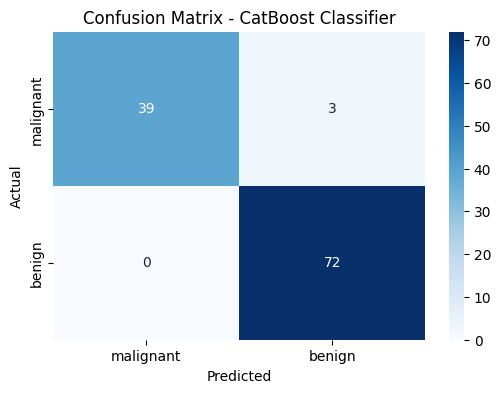

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_seed=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model


1. Data ingestion

- Load data (CSV / DB).

- Basic checks: df.shape, df.info(), df.describe(), target distribution.

2. Exploratory Data Analysis (EDA)

- Target imbalance check (value_counts(normalize=True)).

- Feature distributions, outliers, missingness patterns, correlation.

3. Data preprocessing

- Missing values

- Numeric: SimpleImputer(strategy='median') or leave to model if model handles missing (CatBoost can).

- Categorical: SimpleImputer(strategy='most_frequent') or model-handled.

- Categorical features

- Prefer CatBoost for native categorical handling (no one-hot needed).

- If using XGBoost/LightGBM, use OrdinalEncoder or TargetEncoder (careful with leakage) or OneHot for low-cardinality.

Scaling

- Not required for tree-based boosters.

- Train-test split

- Stratified split to preserve imbalance: train_test_split(..., stratify=y)

4. Address class imbalance

Options:

- Use model-level parameter: scale_pos_weight (XGBoost), class_weight/auto_class_weights (CatBoost).

- Resampling: SMOTE, RandomUnderSampler, or combined. Be careful to do resampling only on training set.

- Prefer model-level plus threshold tuning instead of heavy oversampling for production.

5. Model choice (AdaBoost / XGBoost / CatBoost)

- CatBoost recommended here:

- Native categorical handling.

- Robust to missing values.

- Good default regularization and often good out-of-the-box performance for tabular data.

- XGBoost: very strong, faster in some setups, but requires encoding for categoricals and explicit missing-value handling.

- AdaBoost: usually weaker for complex tabular with many features — not preferred here.

6. Hyperparameter tuning

- Use RandomizedSearchCV (faster) then refine with GridSearchCV or Bayesian (Optuna) for best ROI.

- Use StratifiedKFold with scoring='roc_auc' (or average_precision if precision-recall more important).

- Search space: learning_rate, depth, iterations/estimators, l2_leaf_reg (CatBoost), subsample, colsample_bylevel.

- Use early_stopping_rounds during training where supported.

7. Evaluation metrics (because data is imbalanced)

- Primary: ROC-AUC and PR-AUC (Average Precision) — PR-AUC more informative for imbalanced.

- Secondary: Recall (Sensitivity) for positive class (default = defaulter) — business may prefer catching defaulters (higher recall), but need acceptable precision to avoid too many false positives.

- Also report: Precision, F1-score, Confusion Matrix, Precision@k (top-k), Calibration curve, and Cost-based metrics (expected loss).

- Use threshold tuning (choose threshold maximizing business utility — e.g., maximize expected profit).

8. Model explainability & validation

- SHAP for global/local explanations.

- Partial dependence / feature importance.

- Backtesting on time-split if data temporal.

9. Deployment & monitoring

- Save model (joblib), track data drift, monitor model performance and calibration.

- Create business alerting (if model recall drops).

10. Business benefit

- Reduce default loss by early flagging high-risk customers.

- Focus collections/credit-limits/interventions on predicted high-risk customers.

- Improve ROI by calibrating threshold for intervention cost vs expected recovery.

Dataset shape: (20000, 6)
Target distribution:
 target
0    0.9161
1    0.0839
Name: proportion, dtype: float64
Best Params: {'learning_rate': 0.2, 'max_depth': 5}

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80      3664
           1       0.09      0.31      0.14       336

    accuracy                           0.67      4000
   macro avg       0.50      0.51      0.47      4000
weighted avg       0.85      0.67      0.74      4000

ROC-AUC Score: 0.5143074833645249


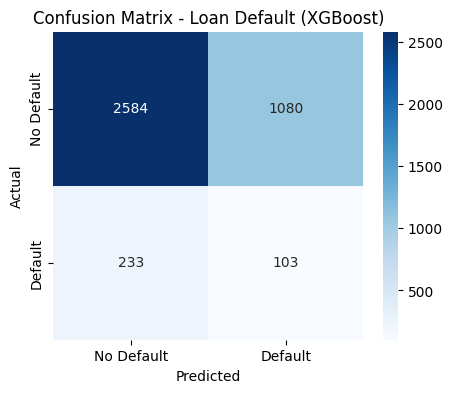

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)

n_samples = 20000
df = pd.DataFrame({
    "age": np.random.randint(18, 70, n_samples),
    "income": np.random.randint(2000, 10000, n_samples),
    "transactions": np.random.randint(1, 200, n_samples),
    "region": np.random.choice(["North", "South", "East", "West"], n_samples),
    "gender": np.random.choice(["Male", "Female"], n_samples),
    "target": np.random.choice([0, 1], n_samples, p=[0.92, 0.08])
})

print("Dataset shape:", df.shape)
print("Target distribution:\n", df['target'].value_counts(normalize=True))


rng = np.random.default_rng(42)
for col in df.columns:
    if col != 'target':
        df.loc[rng.random(len(df)) < 0.05, col] = np.nan

X = df.drop(columns=['target'])
y = df['target'].astype(int)

X = pd.get_dummies(X, drop_first=True)

for col in X.columns:
    if X[col].dtype == 'float64' or X[col].dtype == 'int64':
        X[col].fillna(X[col].median(), inplace=True)
    else:
        X[col].fillna(X[col].mode()[0], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

xgb = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])
)

param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

grid = GridSearchCV(
    xgb,
    param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Loan Default (XGBoost)")
plt.show()
